# Prediction On Wine Quality Analysis

### Overview

#### This project aims to analyze and predict the quality of wines based on various chemical properties. The dataset used for this analysis contains information about different wines, including fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol content, and quality rating.



## Step 1:- Importing Required Packages


### Importing Libraries


In [1]:
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for data visualization 
import matplotlib.pyplot as plt #for plotting 
from sklearn.ensemble import RandomForestClassifier #for classification tasks
from sklearn.svm import SVC #for classification tasks
from sklearn.linear_model import SGDClassifier # SGD is a linear classifier that uses stochastic gradient descent (SGD) to optimize the model parameters
from sklearn.metrics import confusion_matrix, classification_report #for  confusion matrix, classification report, accuracy score
from sklearn.preprocessing import StandardScaler, LabelEncoder # for preprocessing data, scaling, encoding categorical variables
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #for model selection and evaluation
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Step 2:- Loading and Exploring the Dataset



In [2]:
# Import data by using pandas liblary and using read_csv method
wine = pd.read_csv('wine.csv')

### Data Information

In [3]:
# Check the dimensions of the DataFrame
wine.shape


(1599, 12)

In [4]:
#display descriptive statistics for each numerical column
wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Let's check how the data is distributed


In [5]:
# Display the first 5 rows of the DataFrame
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Extract the unique values from the 'quality' column
wine['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
# Display information about the DataFrame
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Missing Values Handling

In [8]:
# count of missing values in each column
wine.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Check for duplicates
wine.duplicated().sum()

240

In [10]:
# Remove duplicates
wine.drop_duplicates(inplace=True)

In [11]:
wine.duplicated().sum()

0

## Step 3 :- Visualization and Plots


#### Here we see that fixed acidity does not give any specification to classify the quality.


<Axes: xlabel='quality', ylabel='fixed acidity'>

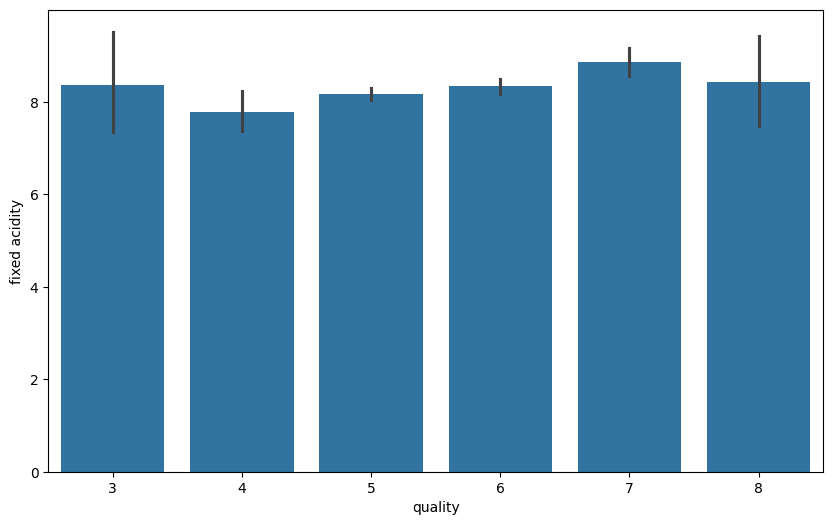

In [12]:
#The 'quality' column values are plotted on the x-axis, and the 'fixed acidity' column values are plotted on the y-axis. 
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed acidity', data=wine,)


#### Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 


<Axes: xlabel='quality', ylabel='volatile acidity'>

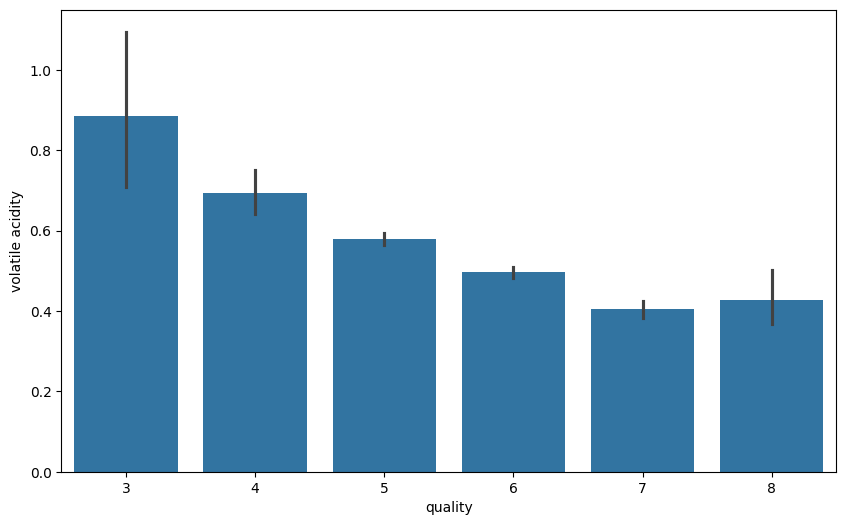

In [13]:
#The 'quality' column values are plotted on the x-axis, and the 'volatile acidity' column values are plotted on the y-axis. 

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

#### Composition of citric acid go higher as we go higher in the quality of the wine


<Axes: xlabel='quality', ylabel='citric acid'>

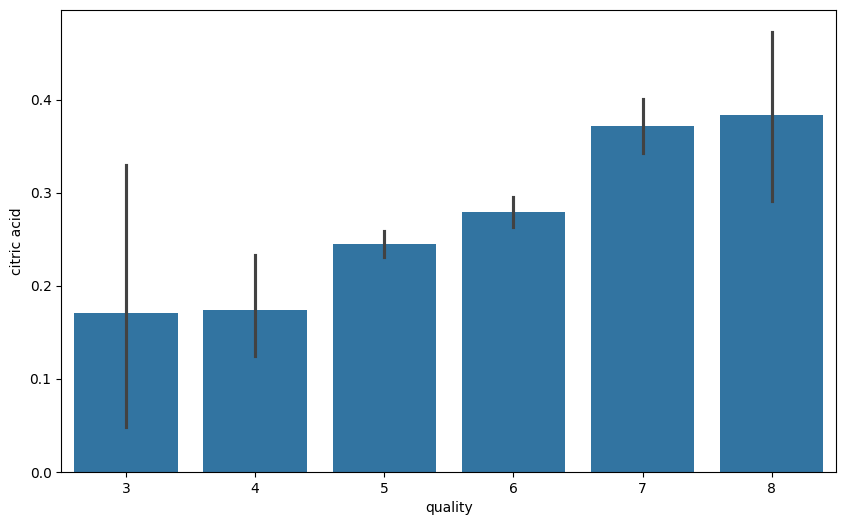

In [14]:
#The 'quality' column values are plotted on the x-axis, and the 'citric acid' column values are plotted on the y-axis. The data for the plot is taken from the 'wine' DataFrame.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

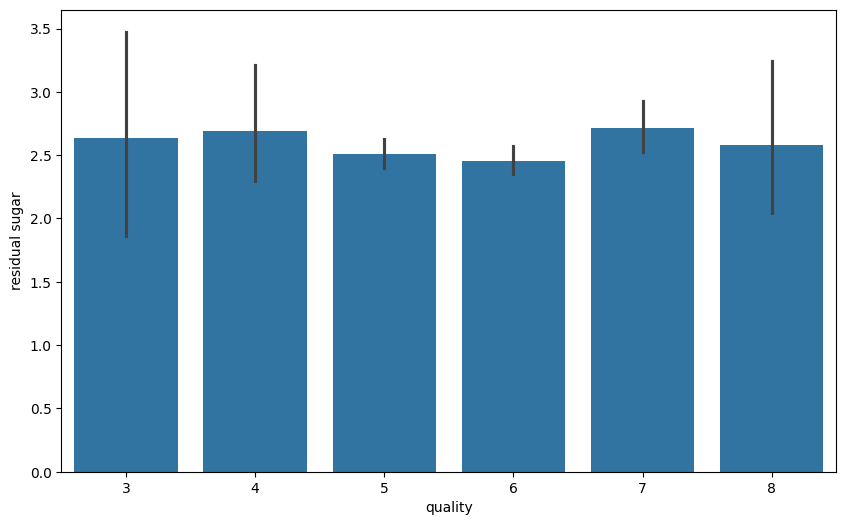

In [15]:
#The 'quality' column values are plotted on the x-axis, and the 'residual sugar' column values are plotted on the y-axis.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

#### Composition of chloride also go down as we go higher in the quality of the wine


<Axes: xlabel='quality', ylabel='chlorides'>

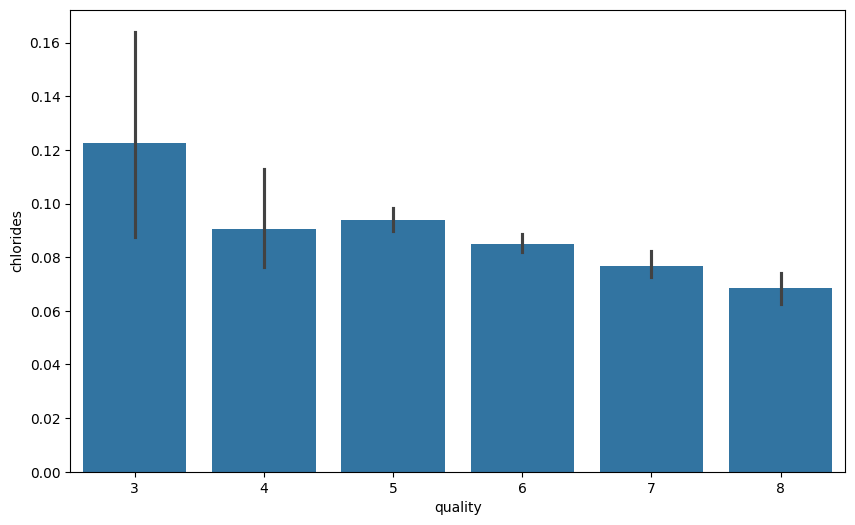

In [16]:
# The 'quality' column values are plotted on the x-axis, and the 'chlorides' column values are plotted on the y-axis.#
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

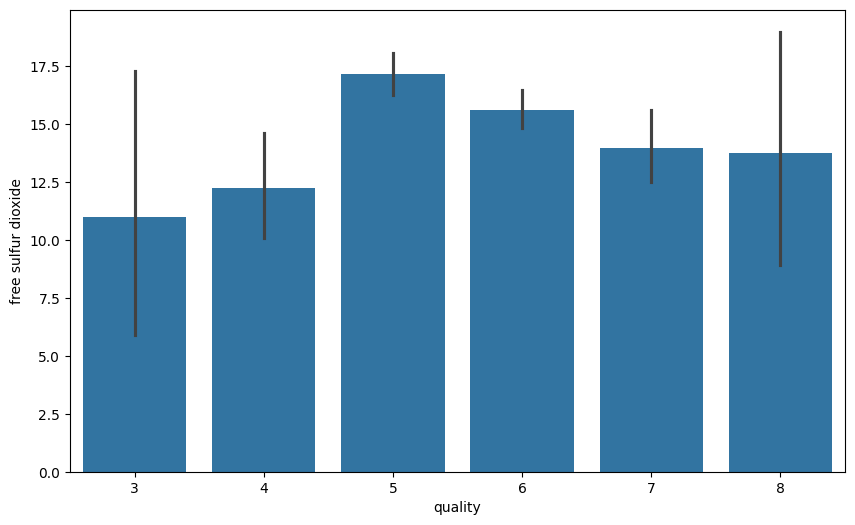

In [17]:
# The 'quality' column values are plotted on the x-axis, and the 'free sulfur dioxide' column values are plotted on the y-axis.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

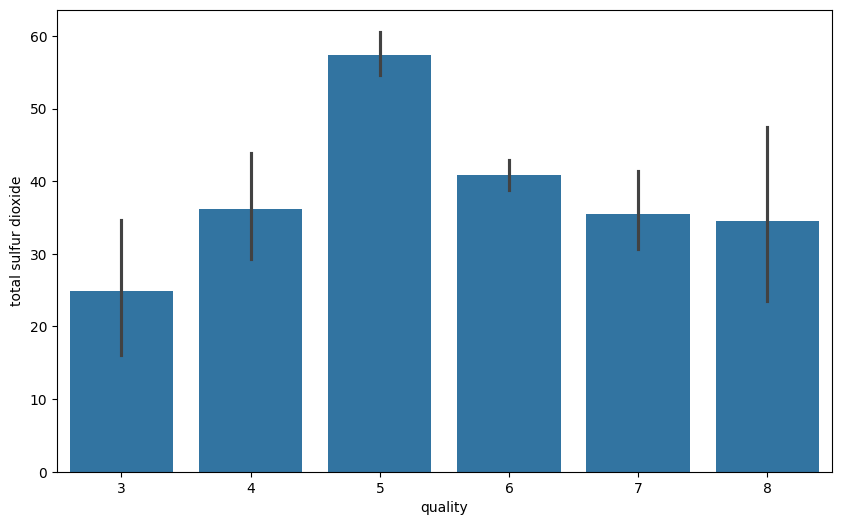

In [18]:
# The 'quality' column values are plotted on the x-axis, and the 'total sulfur dioxide' column values are plotted on the y-axis.

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)


#### Sulphates level goes higher with the quality of wine


<Axes: xlabel='quality', ylabel='sulphates'>

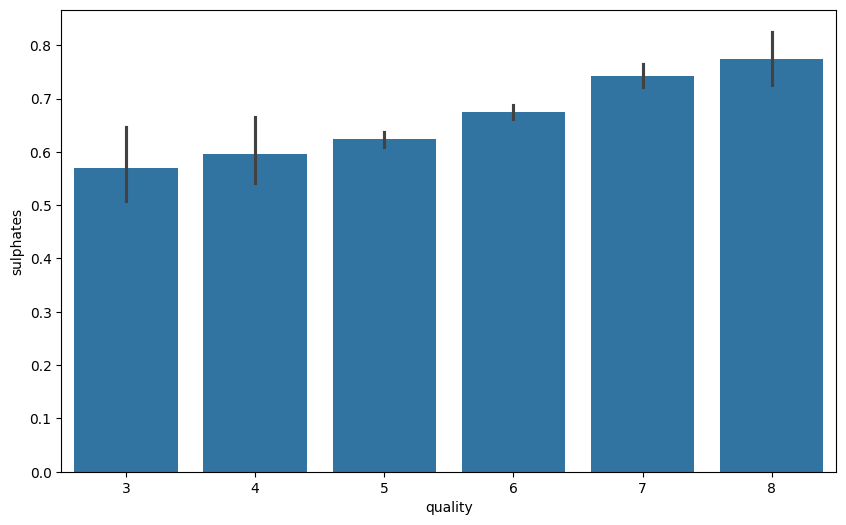

In [19]:
# The 'quality' column values are plotted on the x-axis, and the 'sulphates' column values are plotted on the y-axis.

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

#### Alcohol level also goes higher as te quality of wine increases


<Axes: xlabel='quality', ylabel='alcohol'>

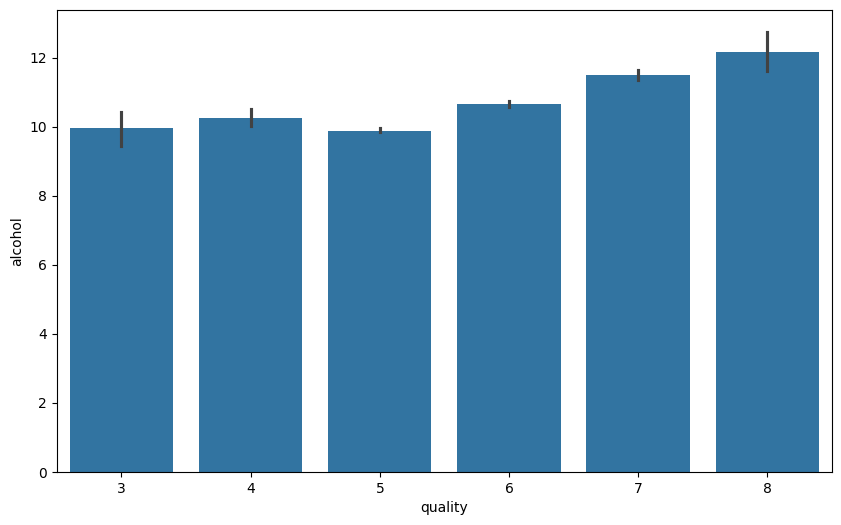

In [20]:
# The 'quality' column values are plotted on the x-axis, and the 'alcohol' column values are plotted on the y-axis.

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Step 4:- Data Preprocessing


In [21]:
#binning numerical data into qualitative categories
bins = (2, 4, 6, 8)
group_names = ['bad', 'neutral', 'good']

In [22]:
#encoding categorical labels as numerical values
label_quality = LabelEncoder()


In [23]:
#categorize the 'quality' column in the wine DataFrame
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)


In [24]:
#converts the categorical labels 'bad', 'good', and 'neutral' into numerical representations using the LabelEncoder 
labels = ['bad', 'good', 'neutral']
encoded_labels = label_quality.fit_transform(labels)

In [25]:
#replace numerical values into their corresponding categorical column
wine['quality'] = wine['quality'].replace({0: encoded_labels[0], 1: encoded_labels[2], 2: encoded_labels[1]})


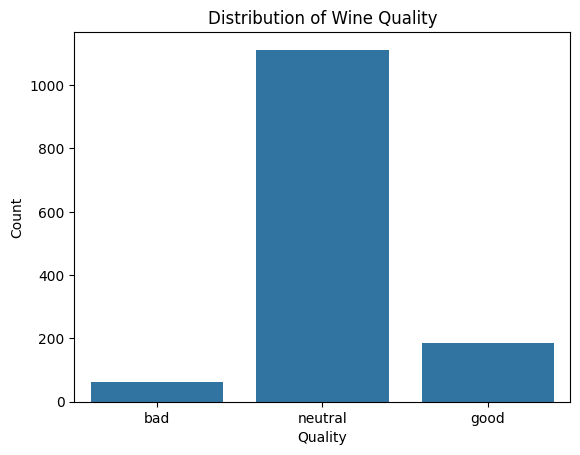

In [26]:
#distribution of wine quality levels with appropriate axis labels and a title.
sns.countplot(x='quality', data=wine)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()


#### Separate features and target variable


In [27]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [28]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

####  Standardize features


In [29]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Our training and testing data is ready now to perform machine learning algorithm

## Step 5:- Model Building and Evaluation


### Random Forest Classifier


In [31]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#### classification report which provides a summary of the precision, recall, F1-score,support

In [32]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        15
        good       0.82      0.41      0.55        34
     neutral       0.86      0.99      0.92       223

    accuracy                           0.86       272
   macro avg       0.56      0.47      0.49       272
weighted avg       0.81      0.86      0.82       272



### Random forest gives the accuracy of 86%


In [33]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[  0   0  15]
 [  0  14  20]
 [  0   3 220]]


### Stochastic Gradient Decent Classifier


In [34]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [35]:
#Let's see how our model performed
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        15
        good       0.71      0.29      0.42        34
     neutral       0.85      0.98      0.91       223

    accuracy                           0.84       272
   macro avg       0.52      0.43      0.44       272
weighted avg       0.79      0.84      0.80       272



### 84% accuracy using stochastic gradient descent classifier


In [36]:
print(confusion_matrix(y_test, pred_sgd))

[[  0   0  15]
 [  0  10  24]
 [  0   4 219]]


### Support Vector Classifier


In [37]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [38]:
print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        15
        good       0.80      0.47      0.59        34
     neutral       0.87      0.98      0.92       223

    accuracy                           0.86       272
   macro avg       0.56      0.48      0.50       272
weighted avg       0.81      0.86      0.83       272



### Support vector classifier gets 86%


### Grid Search CV


In [39]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [40]:
grid_svc.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [41]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

In [42]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        15
        good       0.83      0.29      0.43        34
     neutral       0.85      0.99      0.92       223

    accuracy                           0.85       272
   macro avg       0.56      0.43      0.45       272
weighted avg       0.80      0.85      0.80       272



## Step 6:- Cross-Validation and Final Evaluation



In [43]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8251953788651034

#### The machine learning models trained on the wine quality dataset provide insights into the relationship between chemical properties and wine quality ratings.
